In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tabulate import tabulate 
from sklearn.preprocessing import StandardScaler, LabelEncoder
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from scipy.stats import zscore
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from lightgbm import LGBMClassifier
import warnings
warnings.simplefilter(action='ignore', category=UserWarning)

In [ ]:
data = pd.read_csv("oversampled_Cohen_data.csv")

In [3]:
print(data.isnull().sum())

AFP (pg/ml)                    0
Angiopoietin-2 (pg/ml)         0
AXL (pg/ml)                    0
CA-125 (U/ml)                  0
CA 15-3 (U/ml)                 0
CA19-9 (U/ml)                  0
CD44 (ng/ml)                   0
CEA (pg/ml)                    0
CYFRA 21-1 (pg/ml)             0
DKK1 (ng/ml)                   0
Endoglin (pg/ml)               0
FGF2 (pg/ml)                   0
Follistatin (pg/ml)            0
Galectin-3 (ng/ml)             0
G-CSF (pg/ml)                  0
GDF15 (ng/ml)                  0
HE4 (pg/ml)                    0
HGF (pg/ml)                    0
IL-6 (pg/ml)                   0
IL-8 (pg/ml)                   0
Kallikrein-6 (pg/ml)           0
Leptin (pg/ml)                 0
Mesothelin (ng/ml)             0
Midkine (pg/ml)                0
Myeloperoxidase (ng/ml)        0
NSE (ng/ml)                    0
OPG (ng/ml)                    0
OPN (pg/ml)                    0
PAR (pg/ml)                    0
Prolactin (pg/ml)              0
sEGFR (pg/

In [4]:
data.describe()

,AFP (pg/ml),Angiopoietin-2 (pg/ml),AXL (pg/ml),CA-125 (U/ml),CA 15-3 (U/ml),CA19-9 (U/ml),CD44 (ng/ml),CEA (pg/ml),CYFRA 21-1 (pg/ml),DKK1 (ng/ml),...,sPECAM-1 (pg/ml),TGFa (pg/ml),Thrombospondin-2 (pg/ml),TIMP-1 (pg/ml),TIMP-2 (pg/ml),Omega Score,Age,ethonic,gender,target
count,7308.000000,7308.000000,7308.000000,7308.000000,7308.000000,7308.000000,7308.000000,7308.000000,7.308000e+03,7308.000000,...,7308.000000,7308.000000,7308.000000,7308.000000,7308.000000,7308.000000,7308.000000,7308.00000,7308.000000,7308.000000
mean,22990.820757,2189.263490,2330.885501,57.036091,31.745973,117.970108,18.939445,5136.226807,4.768880e+03,1.044644,...,5782.282501,29.712949,7060.284969,87532.381136,41890.033171,8.088269,60.737548,1.74439,0.433361,4.000000
std,104278.129671,1462.278260,1386.671761,238.276811,80.424425,701.576553,10.023823,25347.204864,2.494991e+04,0.413367,...,1981.423737,236.533038,11620.425214,54692.210800,12784.819981,24.232936,12.211340,1.12016,0.495573,2.582166
min,706.158000,38.391000,0.000000,4.608000,1.320000,14.214000,0.000000,426.440000,1.816458e+03,0.350000,...,0.000000,15.258000,0.000000,976.550000,15026.320000,0.000000,17.000000,1.00000,0.000000,0.000000
25%,913.980000,1268.853253,1456.936384,4.962000,9.446649,16.452000,12.494983,785.274065,1.970916e+03,0.787205,...,4429.001432,16.459722,2026.973309,51076.730000,32691.554591,0.910000,54.000000,1.00000,0.000000,2.000000
50%,1240.292816,1859.520109,2053.445375,5.900886,15.335507,17.490000,16.190722,1280.792539,2.187283e+03,0.950000,...,5464.709129,16.554000,3109.880732,72275.829115,39471.793013,1.319303,62.000000,1.00000,0.000000,4.000000
75%,2604.051087,2714.410320,2816.393860,12.123546,23.539928,31.887879,22.516902,2300.552477,3.872105e+03,1.192439,...,6744.904261,16.935514,7375.142046,105739.233060,48285.371645,3.580722,70.000000,3.00000,1.000000,6.000000
max,600608.892000,30001.791000,12247.310000,3600.024000,1177.446000,12491.472000,148.440000,337245.430000,1.475728e+06,5.970000,...,20178.170000,12018.864000,157461.070000,569512.690000,105748.640000,333.230000,93.000000,7.00000,1.000000,8.000000


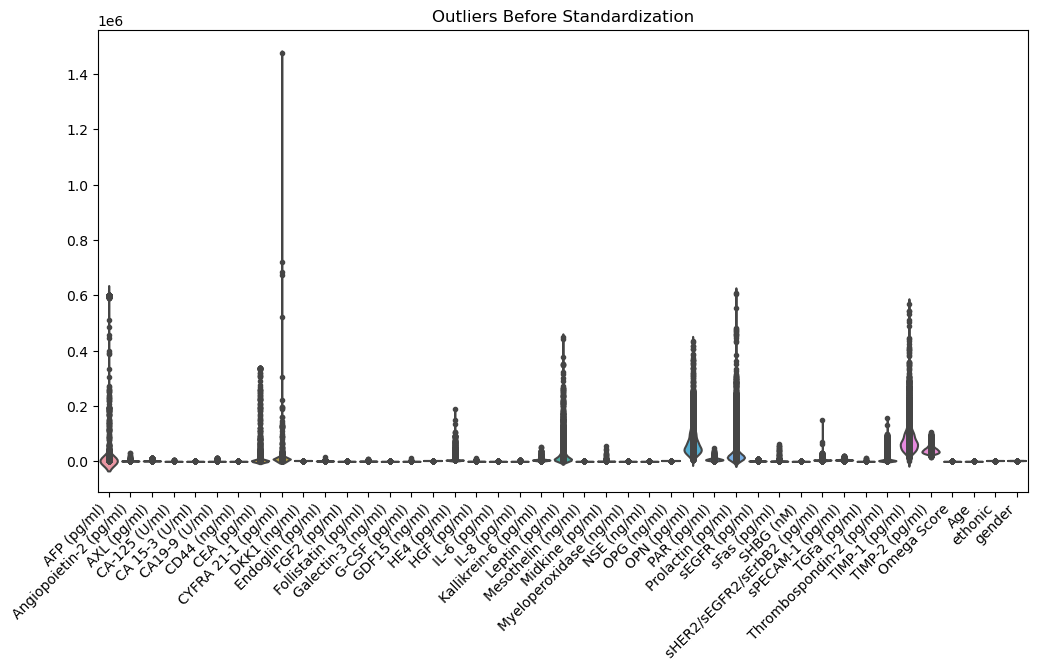

 Number of outliers before Standardization: 4817


In [5]:
class_column = data["target"]
data_without_class = data.drop(columns=["target"])

# Display outliers before standardization
plt.figure(figsize=(12, 6))
sns.violinplot(data=data_without_class, inner="point", scale="width")
plt.xticks(rotation=45, ha="right")
plt.title("Outliers Before Standardization")
plt.show()

# Calculate the number of outliers before standardization
z_scores_before = np.abs(zscore(data_without_class))
outliers_before = (z_scores_before > 3).sum().sum()
print(f" Number of outliers before Standardization: {outliers_before}")


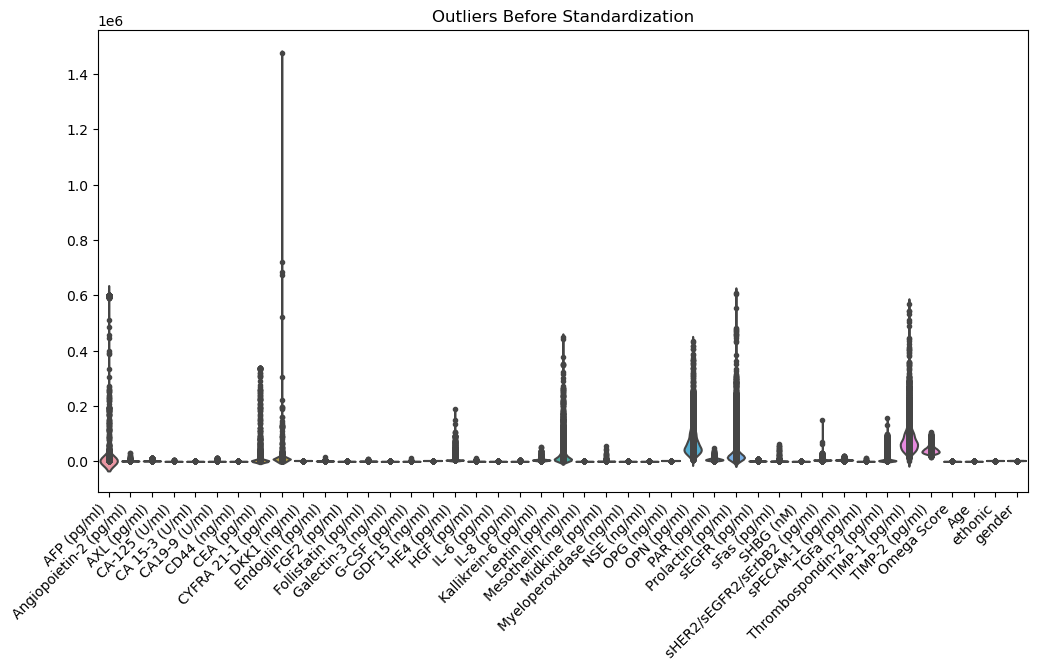

Number of outliers after standardization: 4817


In [6]:
# Apply Standardization
scaler = StandardScaler()
data_standardized = pd.DataFrame(scaler.fit_transform(data_without_class), columns=data_without_class.columns)

# Visualizing outliers after standardization
plt.figure(figsize=(12, 6))
sns.violinplot(data=data_without_class, inner="point", scale="width")
plt.xticks(rotation=45, ha="right")
plt.title("Outliers Before Standardization")
plt.show()

# Calculate the number of outliers after standardization
z_scores_after = np.abs(zscore(data_standardized))
outliers_after = (z_scores_after > 3).sum().sum()
print(f"Number of outliers after standardization: {outliers_after}")


In [7]:
# Compute variance for each column
variance = data_standardized.var()

# Identify columns with zero variance
low_variance_cols = variance[variance == 0]

# Display columns with zero variance along with their variance values
print("Columns with zero variance:")
print(low_variance_cols)


Columns with zero variance:
Series([], dtype: float64)


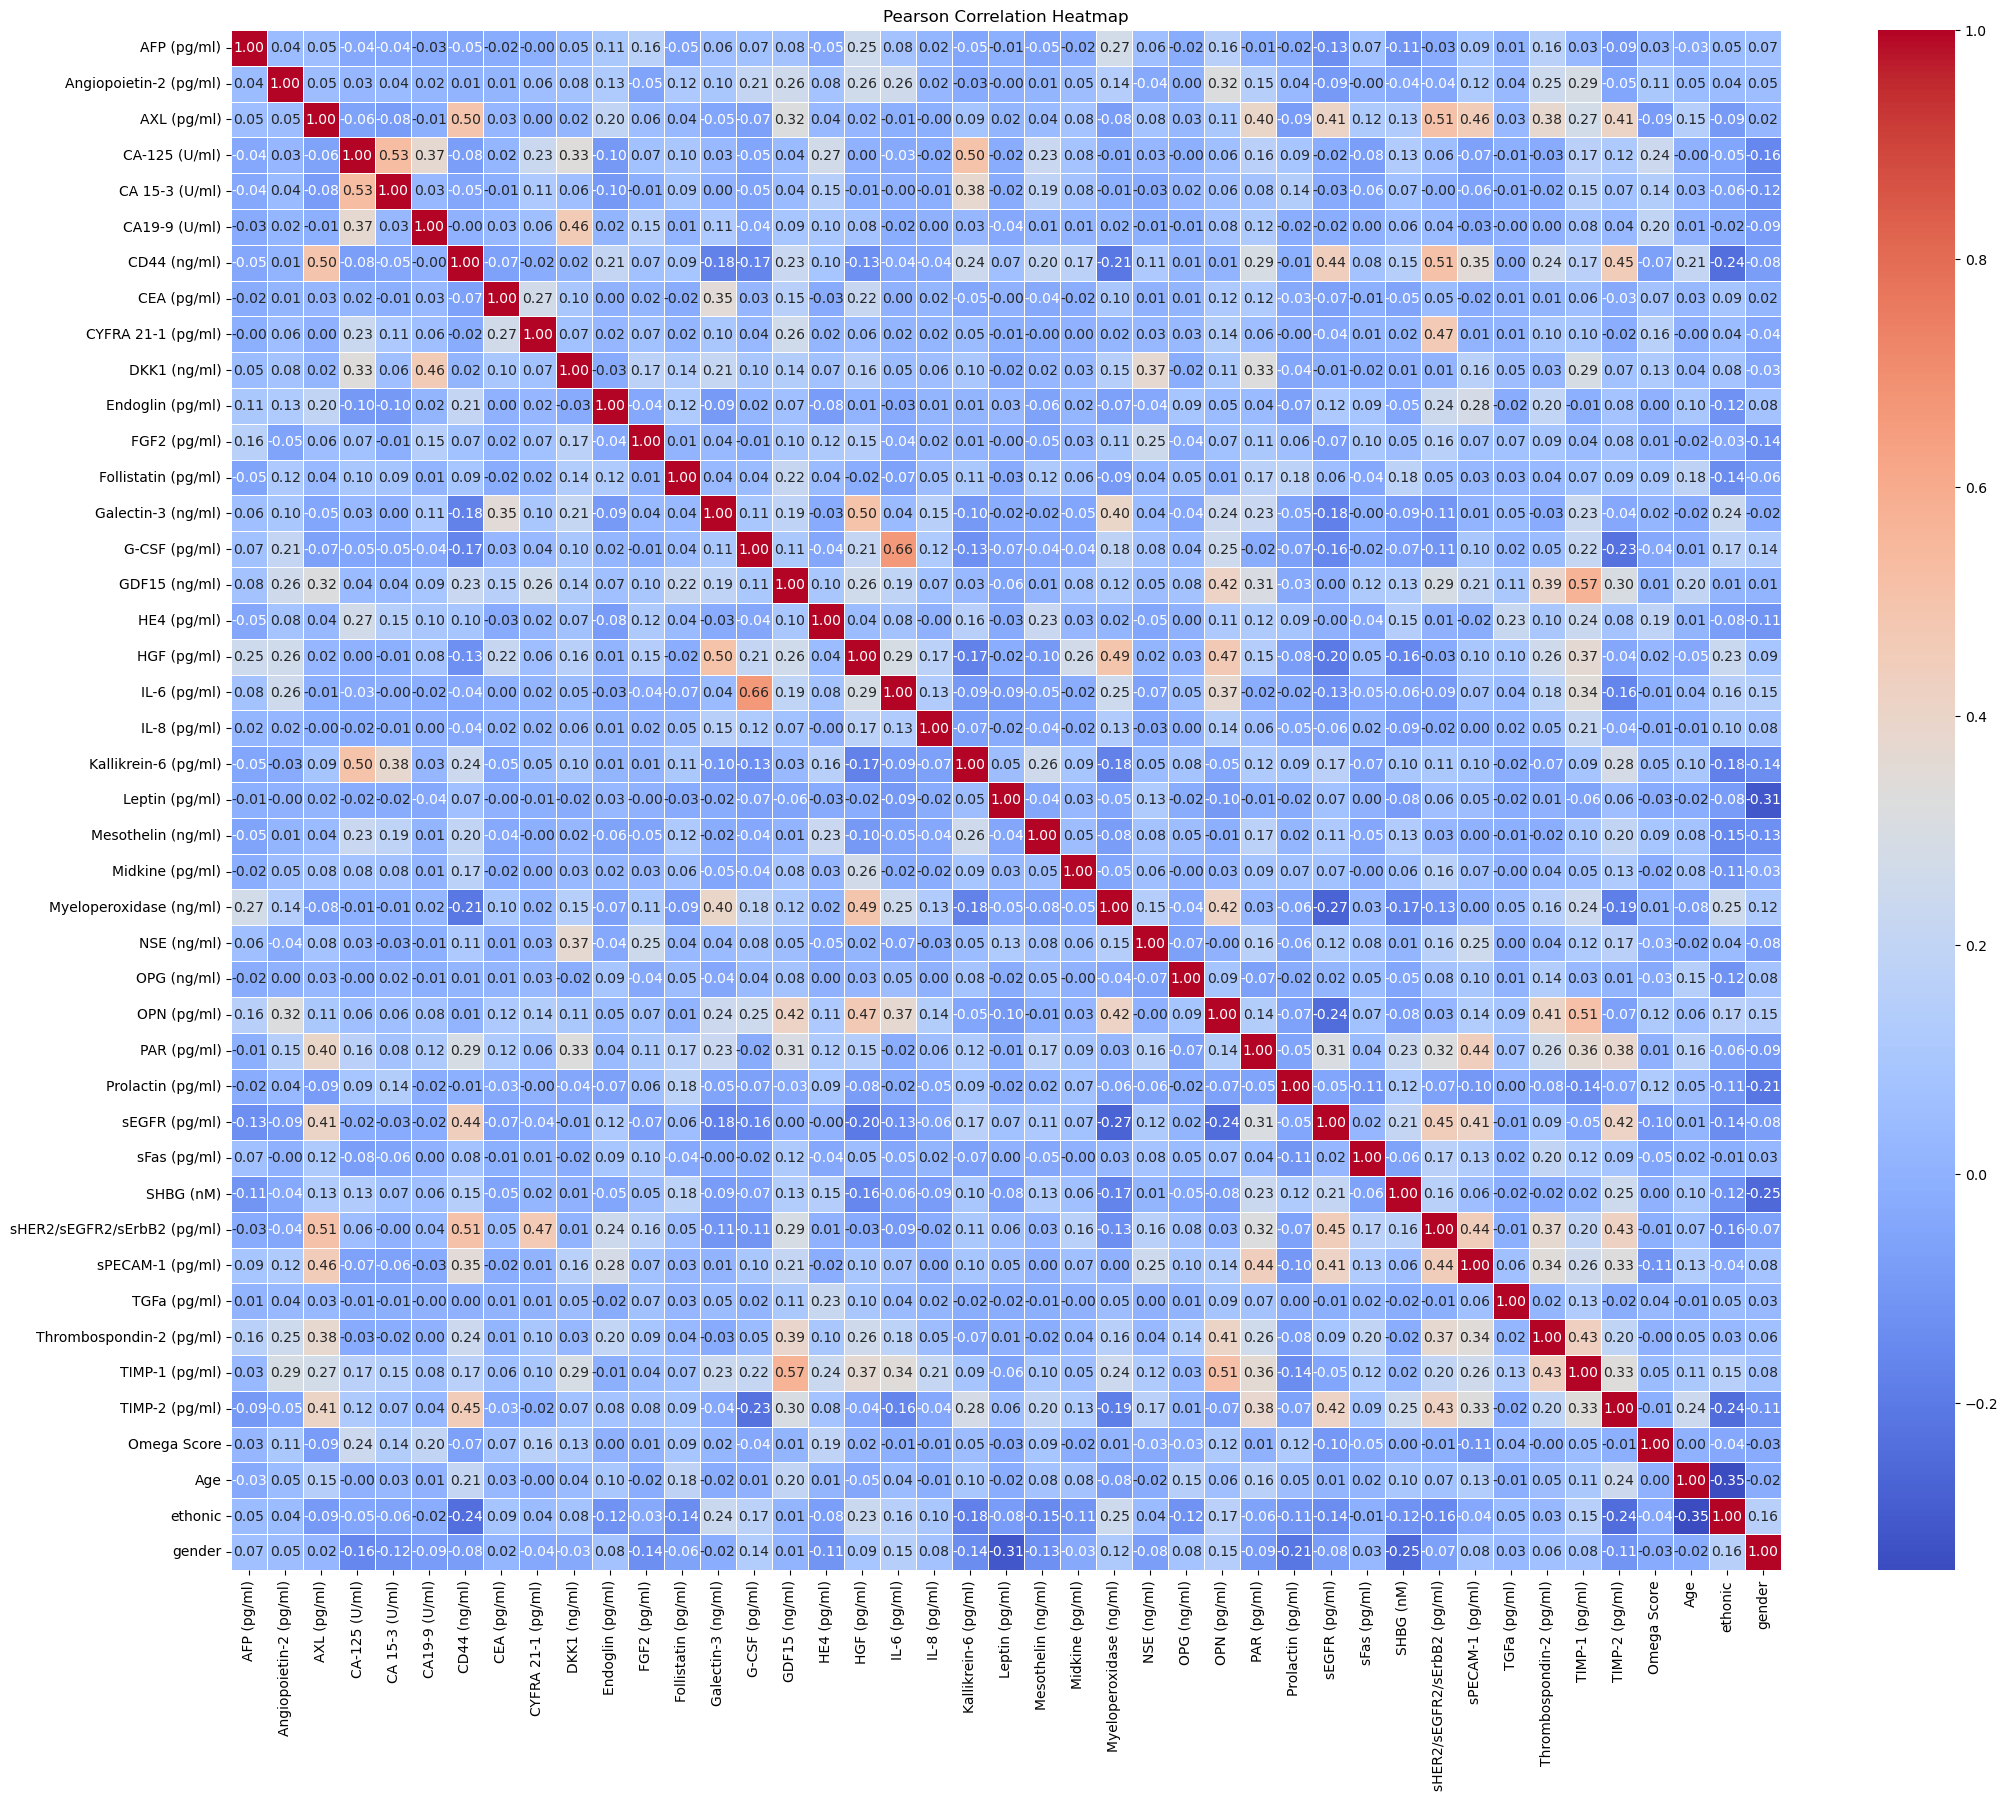

Features removed due to high correlation: set()
Original dataset shape: (7308, 44)
Reduced dataset shape: (7308, 43)


In [8]:
# Compute Pearson Correlation
corr_matrix = data_standardized.corr(method='pearson')

plt.figure(figsize=(25, 20))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Pearson Correlation Heatmap")
plt.show()

# Remove highly correlated features
threshold = 0.7
to_drop = set()

for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            colname = corr_matrix.columns[i]
            to_drop.add(colname)  

df_reduced = data_standardized.drop(columns=to_drop)

print(f"Features removed due to high correlation: {to_drop}")
print(f"Original dataset shape: {data.shape}")
print(f"Reduced dataset shape: {df_reduced.shape}")


In [10]:
# Add the "class" column back to the reduced dataset
data["target"] = class_column

# Separate features and target variable
X = data.drop(columns=["target"])
y = data["target"]


In [12]:
# Train the model
model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
model.fit(X, y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [13]:
# Get feature importance scores
feature_importance = model.feature_importances_
feature_names = X.columns

In [14]:
selected_features_list = []
# Create a DataFrame to store feature importance
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

# Sort features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print("📊 Training XGBoost model and ranking feature importance...")

# Display ranked feature importance
print("\nTop 25 Features by Importance:")
print(feature_importance_df.head(25))

# Select the top 25 most important features
selected_features = feature_importance_df.head(25)['Feature'].tolist()
selected_features_list.extend(selected_features)

# Remove duplicates and finalize selected features
final_selected_features = list(set(selected_features_list))

# Display final selected features
print("\nFinal Selected Features:")
print(final_selected_features)

📊 Training XGBoost model and ranking feature importance...

Top 25 Features by Importance:
                        Feature  Importance
42                       gender    0.096808
33  sHER2/sEGFR2/sErbB2 (pg/ml)    0.089467
3                 CA-125 (U/ml)    0.069140
19                 IL-8 (pg/ml)    0.055204
0                   AFP (pg/ml)    0.041413
41                      ethonic    0.039762
35                 TGFa (pg/ml)    0.034046
31                 sFas (pg/ml)    0.033875
24      Myeloperoxidase (ng/ml)    0.031794
5                 CA19-9 (U/ml)    0.028858
15                GDF15 (ng/ml)    0.024741
18                 IL-6 (pg/ml)    0.023937
36     Thrombospondin-2 (pg/ml)    0.023740
40                          Age    0.022119
39                  Omega Score    0.019853
6                  CD44 (ng/ml)    0.019351
17                  HGF (pg/ml)    0.019346
37               TIMP-1 (pg/ml)    0.019014
7                   CEA (pg/ml)    0.018736
2                   AXL (pg/m

In [21]:
X = data[['Omega Score',
           'AXL (pg/ml)', 
                             'TIMP-2 (pg/ml)', 
                             'CEA (pg/ml)', 
                             'gender', 
                             'sFas (pg/ml)', 
                             'Myeloperoxidase (ng/ml)', 
                             'IL-8 (pg/ml)', 
                             'GDF15 (ng/ml)', 
                             'TGFa (pg/ml)', 
                             'Leptin (pg/ml)', 
                             'sHER2/sEGFR2/sErbB2 (pg/ml)', 
                             'AFP (pg/ml)', 
                             'CA 15-3 (U/ml)', 
                             'TIMP-1 (pg/ml)', 
                             'CA19-9 (U/ml)', 
                             'Thrombospondin-2 (pg/ml)', 
                             'CD44 (ng/ml)', 
                             'CA-125 (U/ml)', 
                             'NSE (ng/ml)', 
                             'ethonic', 
                             'HGF (pg/ml)', 
                             'OPN (pg/ml)', 
                             'IL-6 (pg/ml)', 
                             'Age']]
y = data["target"]

In [22]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y, test_size=0.2, random_state=42)

In [24]:
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42),
    "LightGBM": LGBMClassifier(random_state=42)
}


In [25]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    matthews_corrcoef,
    roc_auc_score,
    log_loss
)

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)  # Train the model
    
    # Predictions
    y_pred = model.predict(X_test)
    
    # If the model has probability prediction (needed for ROC AUC & Log Loss)
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)
    else:
        y_proba = None
    
    # Metrics calculation
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
    mcc = matthews_corrcoef(y_test, y_pred)
    
    if y_proba is not None and len(set(y_test)) == 2:  # Binary classification check
        roc_auc = roc_auc_score(y_test, y_proba[:, 1])
        logloss = log_loss(y_test, y_proba)
    elif y_proba is not None:
        roc_auc = roc_auc_score(y_test, y_proba, multi_class='ovr', average='weighted')
        logloss = log_loss(y_test, y_proba)
    else:
        roc_auc = None
        logloss = None
    
    # Save results
    results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'MCC': mcc,
        'ROC AUC': roc_auc,
        'Log Loss': logloss
    }

for model_name, metrics in results.items():
    print(f"\n{model_name} Results:")
    for metric_name, value in metrics.items():
        if value is not None:
            print(f"{metric_name}: {value:.4f}")
        else:
            print(f"{metric_name}: Not Available")

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000918 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5695
[LightGBM] [Info] Number of data points in the train set: 5846, number of used features: 25
[LightGBM] [Info] Start training from score -2.182789
[LightGBM] [Info] Start training from score -2.216743
[LightGBM] [Info] Start training from score -2.193468
[LightGBM] [Info] Start training from score -2.191936
[LightGBM] [Info] Start training from score -2.190406
[LightGBM] [Info] Start training from score -2.218314
[LightGBM] [Info] Start training from score -2.178247
[LightGBM] [Info] Start training from score -2.207368
[LightGBM] [Info] Start training from score -2.196541
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[